In [247]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import datetime
#!pip install plotly --upgrade
#!pip install --upgrade notebook

CRÉATION DES TROIS DATAFRAMES PRINCIPAUX

In [248]:
customers = pd.read_csv("customers.csv")
products = pd.read_csv("products.csv")
transactions = pd.read_csv("transactions.csv")

JOINTURE ENTE TRANSACTIONS ET PRODUITS

In [249]:
demi_data = pd.merge(transactions, products, on='id_prod', how = 'outer')

SUPPRESSION DES ACHATS TEST ET PRIX NÉGATIFS

In [250]:
demi_data = demi_data.sort_values(by='price').iloc[200:]

VALEUR SECRETE A RESSORTIR

In [251]:
secret_value = demi_data.sort_values(by='session_id').tail(22)

demi_data = demi_data.sort_values(by='session_id').iloc[:336816]
demi_data

,id_prod,date,session_id,client_id,price,categ
207638,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,11.99,0.0
122994,1_635,2021-03-01 00:10:33.163037,s_10,c_2218,26.99,1.0
182065,0_1451,2021-03-01 04:43:58.025677,s_100,c_3854,19.99,0.0
118391,0_1030,2021-03-01 04:12:43.572994,s_100,c_3854,13.73,0.0
61019,0_1590,2021-03-03 02:49:03.169115,s_1000,c_1014,18.93,0.0
...,...,...,...,...,...,...
21894,0_1609,2021-10-04 18:39:10.485474,s_99996,c_4900,18.99,0.0
181757,0_1197,2021-10-04 18:45:38.003516,s_99997,c_3521,6.99,0.0
236158,0_1604,2021-10-04 19:00:20.030388,s_99998,c_2795,17.51,0.0
163750,0_1411,2021-10-04 18:50:59.099942,s_99998,c_2795,8.99,0.0


PRODUITS TOUJOURS EN STOCKS

In [294]:
instock_products = demi_data.tail(22)

secret_value

,id_prod,date,session_id,client_id,price,categ
195787,0_1612,2021-10-04 18:15:13.249304,s_99986,c_4924,13.54,0.0
98942,0_1089,2021-10-04 18:21:01.948122,s_99989,c_6790,3.99,0.0
172861,0_1688,2021-03-22 18:27:20.541991,s_9999,c_3239,7.26,0.0
249130,0_1384,2021-03-22 18:13:44.104125,s_9999,c_3239,14.44,0.0
53398,0_1580,2021-03-22 17:44:25.888687,s_9999,c_3239,13.26,0.0
185591,0_1446,2021-10-04 18:30:14.040803,s_99990,c_1609,8.09,0.0
60175,0_1072,2021-10-04 18:31:38.937103,s_99990,c_1609,14.82,0.0
134309,0_1353,2021-10-04 18:25:08.832179,s_99991,c_664,19.99,0.0
142212,0_1527,2021-10-04 18:29:49.024816,s_99992,c_24,7.99,0.0
33967,0_1434,2021-10-04 18:32:25.964328,s_99993,c_4088,8.58,0.0


TOTALITÉS DES PRODUITS VENDUES

In [253]:
products_sold = demi_data.dropna()

products_sold

,id_prod,date,session_id,client_id,price,categ
207638,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,11.99,0.0
122994,1_635,2021-03-01 00:10:33.163037,s_10,c_2218,26.99,1.0
182065,0_1451,2021-03-01 04:43:58.025677,s_100,c_3854,19.99,0.0
118391,0_1030,2021-03-01 04:12:43.572994,s_100,c_3854,13.73,0.0
61019,0_1590,2021-03-03 02:49:03.169115,s_1000,c_1014,18.93,0.0
...,...,...,...,...,...,...
21894,0_1609,2021-10-04 18:39:10.485474,s_99996,c_4900,18.99,0.0
181757,0_1197,2021-10-04 18:45:38.003516,s_99997,c_3521,6.99,0.0
236158,0_1604,2021-10-04 19:00:20.030388,s_99998,c_2795,17.51,0.0
163750,0_1411,2021-10-04 18:50:59.099942,s_99998,c_2795,8.99,0.0


JOINTURE FINAL AVEC L'AJOUT DES CLIENTS

In [254]:
full_data = pd.merge(products_sold, customers, on='client_id', how = 'outer')

full_data

,id_prod,date,session_id,client_id,price,categ,sex,birth
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,11.99,0.0,f,1967
1,0_1267,2021-10-07 21:27:45.993285,s_101492,c_329,3.99,0.0,f,1967
2,1_257,2021-11-19 00:35:25.438359,s_121737,c_329,22.99,1.0,f,1967
3,1_397,2021-11-23 18:21:56.361813,s_123998,c_329,18.99,1.0,f,1967
4,1_367,2022-02-08 08:11:24.819247,s_161831,c_329,13.99,1.0,f,1967
...,...,...,...,...,...,...,...,...
336731,NaN,NaN,NaN,c_7584,NaN,NaN,f,1960
336732,NaN,NaN,NaN,c_90,NaN,NaN,m,2001
336733,NaN,NaN,NaN,c_587,NaN,NaN,m,1993
336734,NaN,NaN,NaN,ct_1,NaN,NaN,m,2001


CLIENTS INCRIT N'AYANT RIEN ACHETER

In [255]:
customers_nobuyer = full_data.sort_values(by='id_prod').tail(21)

customers_nobuyer

,id_prod,date,session_id,client_id,price,categ,sex,birth
336715,NaN,NaN,NaN,c_4406,NaN,NaN,f,1998
336716,NaN,NaN,NaN,ct_0,NaN,NaN,f,2001
336717,NaN,NaN,NaN,c_2706,NaN,NaN,f,1967
336718,NaN,NaN,NaN,c_3443,NaN,NaN,m,1959
336719,NaN,NaN,NaN,c_4447,NaN,NaN,m,1956
336720,NaN,NaN,NaN,c_3017,NaN,NaN,f,1992
336721,NaN,NaN,NaN,c_4086,NaN,NaN,f,1992
336722,NaN,NaN,NaN,c_6930,NaN,NaN,m,2004
336723,NaN,NaN,NaN,c_4358,NaN,NaN,m,1999
336724,NaN,NaN,NaN,c_8381,NaN,NaN,f,1965


CLIENTS AYANT ACHETÉS

In [256]:
customers_buyer = full_data.dropna()

customers_buyer.sort_values(by='date')

,id_prod,date,session_id,client_id,price,categ,sex,birth
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,11.99,0.0,f,1967
178008,0_1390,2021-03-01 00:02:26.047414,s_2,c_664,19.37,0.0,m,1960
192933,0_1352,2021-03-01 00:02:38.311413,s_3,c_580,4.50,0.0,m,1988
126578,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912,6.55,0.0,f,1989
281293,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033,16.49,0.0,f,1956
...,...,...,...,...,...,...,...,...
165330,1_456,2022-02-28 23:56:57.196281,s_172422,c_5787,28.27,1.0,f,1986
67003,1_370,2022-02-28 23:56:57.561424,s_172423,c_1460,13.11,1.0,m,1989
53093,0_1538,2022-02-28 23:57:12.741573,s_172424,c_1876,8.61,0.0,m,1983
67002,0_1403,2022-02-28 23:59:02.381670,s_172423,c_1460,15.99,0.0,m,1989


CALCULER LA MOYENNE DES PRIX PAR CATÉGORIE

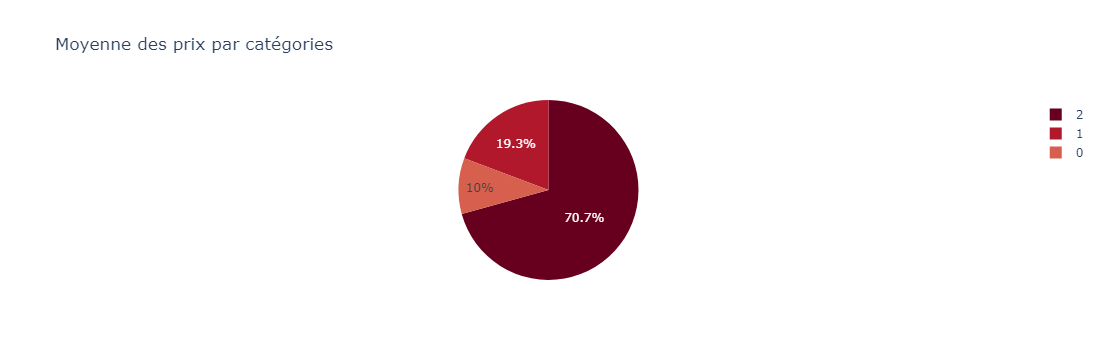

In [257]:
aver = customers_buyer.groupby('categ').mean()
aver = aver.reset_index()
average_price = aver.drop('birth', axis=1)


px.pie(average_price, values='price', names='categ', title='Moyenne des prix par catégories', color_discrete_sequence=px.colors.sequential.RdBu)

DATAFRAME DU CHIFFRE D'AFFAIRES PAR JOURS

In [283]:
jours = customers_buyer.sort_values(by='date')
jours['date'] = pd.to_datetime(jours['date'], dayfirst=True).dt.strftime('%Y-%m-%d')
jours = jours.groupby('date').sum()
jours = jours.sort_values(by='date')
jours = jours[['price']]
jours = jours.reset_index()
jours = jours.rename(columns={"price": "profits"})
jours

jours

,date,profits
0,2021-03-01,16416.24
1,2021-03-02,15337.47
2,2021-03-03,14751.75
3,2021-03-04,15047.09
4,2021-03-05,17173.41
...,...,...
360,2022-02-24,20189.72
361,2022-02-25,18181.96
362,2022-02-26,19759.58
363,2022-02-27,19021.83


CHIFFRE D'AFFAIRES PAR JOURS

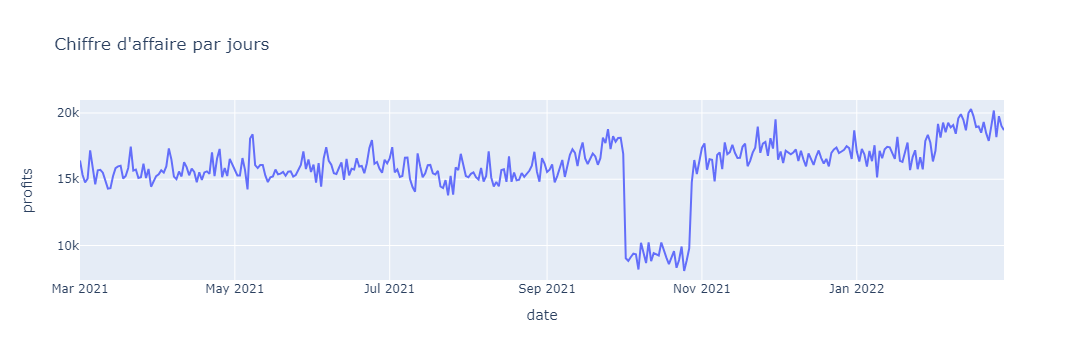

In [284]:
fig = px.line(jours, x='date', y='profits', title="Chiffre d'affaire par jours")
fig.show()

DATAFRAME DU CHIFFRE D'AFFAIRES PAR MOIS

In [278]:
temps = customers_buyer.sort_values(by='date')
temps['date'] = pd.to_datetime(ok['date'], dayfirst=True).dt.strftime('%Y-%m')
temps = temps.groupby('date').sum()
temps = temps.sort_values(by='date')
temps = temps[['price']]
temps = temps.reset_index()
temps = temps.rename(columns={"price": "profits"})
temps

,date,profits
0,2021-03,541.82
1,2021-04,499.21
2,2021-05,609.08
3,2021-06,467.86
4,2021-07,401.47
5,2021-08,371.39
6,2021-09,300.76
7,2021-10,514.38
8,2021-11,327.55
9,2021-12,387.38


CHIFFRE D'AFFAIRES PAR MOIS

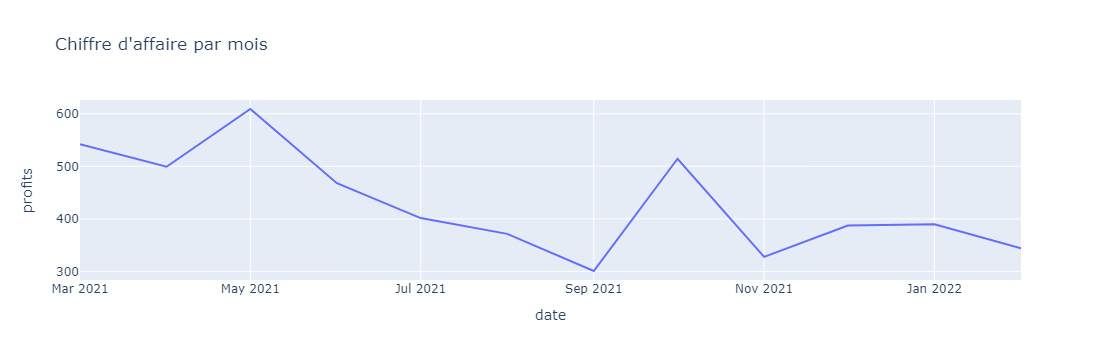

In [279]:
fig = px.line(temps, x='date', y='profits', title="Chiffre d'affaire par mois")
fig.show()

DATAFAME ILLUSTRANT LES DÉPENSES TOTAL PAR CLIENT

In [241]:
client = customers_buyer.groupby('client_id')
client = client.sum()
iencli = client.reset_index()
iencli = iencli.rename(columns={"price": "total_spent"})
iencli_spent = iencli[["client_id", "total_spent"]].sort_values(by='total_spent', ascending=False)
iencli_spent = iencli_spent.head(10)

iencli = iencli.drop(['categ', 'birth'], axis=1)
iencli

,client_id,total_spent
0,c_1,300.65
1,c_10,586.18
2,c_100,222.87
3,c_1000,980.02
4,c_1001,1102.45
...,...,...
8595,c_995,119.08
8596,c_996,739.60
8597,c_997,572.89
8598,c_998,1527.69


TOP 10 DES CLIENTS AYANTS LE PLUS DÉPENSÉS

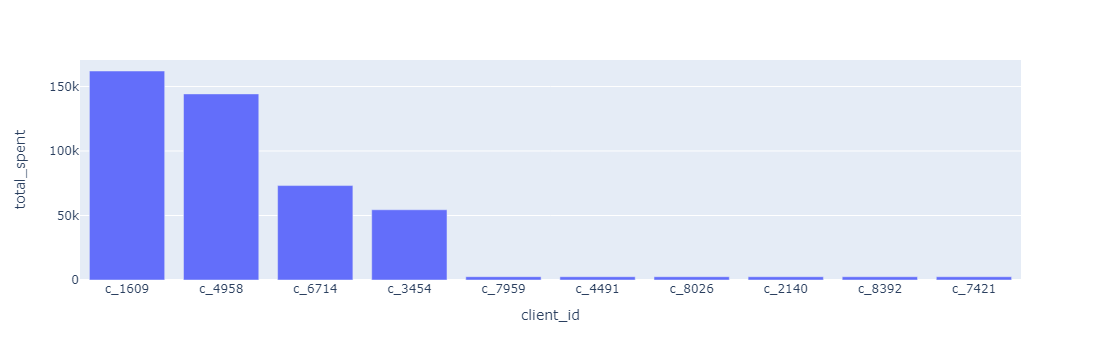

In [242]:
px.bar(iencli_spent, x='client_id', y='total_spent')

CRÉATION DU DATAFRAME AVEC UN CLIENT PAR LIGNE

In [243]:
compte = customers_buyer.groupby('client_id')
compte = compte[['id_prod']].count()
compte.reset_index()

client_infos = pd.merge(iencli, compte, on='client_id', how = 'outer')

sessions = customers_buyer.groupby('client_id')
sessions = sessions[['session_id']].nunique()
sessions = sessions.reset_index()

client_infos = pd.merge(client_infos, sessions, how = 'outer')

client_infos =pd.merge(client_infos, customers, how = 'outer')
client_infos = client_infos.dropna()

client_infos = client_infos.rename(columns={"price": "total_spent", "id_prod": "total_prod", "session_id": "total_session"})
client_infos[['Age']] = 2024 - client_infos[['birth']]
client_infos = client_infos.drop(['birth'], axis=1)
client_infos['moyenne'] = client_infos['total_spent'] / client_infos['total_session']
client_infos

,client_id,total_spent,total_prod,total_session,sex,Age,moyenne
0,c_1,300.65,20.0,15.0,m,69,20.043333
1,c_10,586.18,28.0,16.0,m,68,36.636250
2,c_100,222.87,6.0,3.0,m,32,74.290000
3,c_1000,980.02,56.0,42.0,f,58,23.333810
4,c_1001,1102.45,58.0,24.0,m,42,45.935417
...,...,...,...,...,...,...,...
8595,c_995,119.08,8.0,5.0,m,69,23.816000
8596,c_996,739.60,42.0,36.0,f,54,20.544444
8597,c_997,572.89,23.0,10.0,f,30,57.289000
8598,c_998,1527.69,28.0,13.0,m,23,117.514615


TABLEAU DE CORRÉLATION

In [244]:
corr_client = client_infos.corr(method="pearson")
corr_client

,total_spent,total_prod,total_session,Age,moyenne
total_spent,1.000000,0.879970,0.908031,-0.039311,0.031288
total_prod,0.879970,1.000000,0.966036,0.006471,-0.054839
total_session,0.908031,0.966036,1.000000,0.034473,-0.070662
Age,-0.039311,0.006471,0.034473,1.000000,-0.635116
moyenne,0.031288,-0.054839,-0.070662,-0.635116,1.000000


REPRÉSENTATION GRAPHIQUE DU TABLEAU DE CORRÉLATION

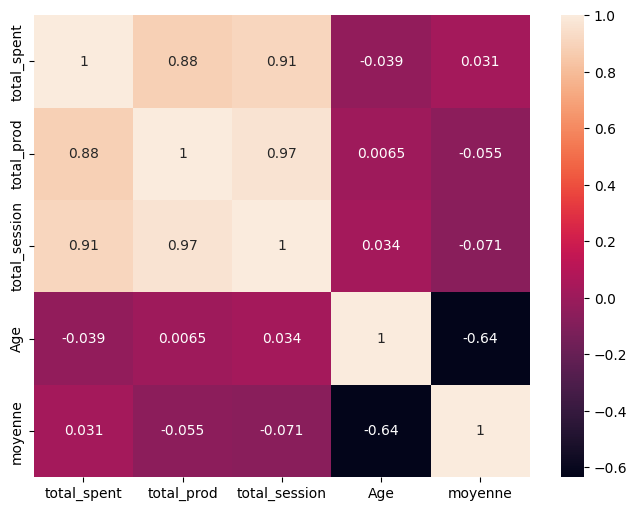

In [245]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_client, annot=True)
plt.show()

LOCALISER L'ID PROD 0_2245

In [246]:
transactions.query('id_prod == "0_2245"')

,id_prod,date,session_id,client_id
6235,0_2245,2021-06-17 03:03:12.668129,s_49705,c_1533
10802,0_2245,2021-06-16 05:53:01.627491,s_49323,c_7954
14051,0_2245,2021-11-24 17:35:59.911427,s_124474,c_5120
17486,0_2245,2022-02-28 18:08:49.875709,s_172304,c_4964
21078,0_2245,2021-03-01 00:09:29.301897,s_3,c_580
...,...,...,...,...
322710,0_2245,2021-04-06 19:59:19.462288,s_16936,c_4167
329417,0_2245,2021-03-30 23:29:02.347672,s_13738,c_7790
330490,0_2245,2021-12-03 14:14:40.444177,s_128815,c_6189
335531,0_2245,2021-04-27 18:58:47.703374,s_26624,c_1595


CRÉATION DU FICHIER CSV

In [290]:
pd.write secret_value

/home/ryan/code/RyanHo93/LibrairieEnLigne


In [302]:
secret_value.to_csv('LibrairieEnLigne.csv')
customers_nobuyer.to_csv('LibrairieEnLigne.csv')